In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Define stratified cross-validation
skf = StratifiedKFold(n_splits=5)

# Print dataset information
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")


Features shape: (150, 4)
Labels shape: (150,)


In [11]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling (Standardization)
X_scaled = scaler.fit_transform(X)


In [12]:
# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Lists to store accuracy and predictions
accuracies = []
all_predictions = []
all_true_labels = []

# Perform Stratified Cross-Validation
for train_index, test_index in skf.split(X_scaled, y):
    # Split the data into training and testing sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the classifier
    nb_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = nb_classifier.predict(X_test)

    # Store predictions and true labels
    all_predictions.extend(y_pred)
    all_true_labels.extend(y_test)

    # Evaluate accuracy for the current fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Print cross-validation results
print(f"Cross-Validation Accuracies: {accuracies}")
print(f"Mean Accuracy: {np.mean(accuracies)}")


Cross-Validation Accuracies: [0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0]
Mean Accuracy: 0.9533333333333334


In [13]:
# Print classification report
print("\nClassification Report:")
print(classification_report(all_true_labels, all_predictions, target_names=iris.target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(all_true_labels, all_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.94      0.93        50
   virginica       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150


Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]


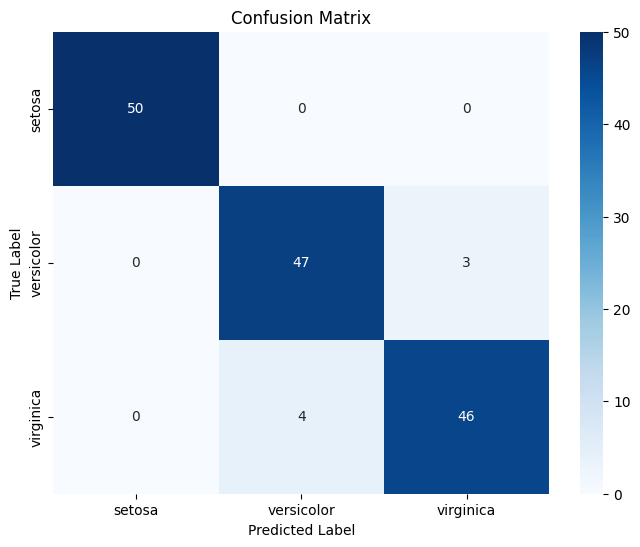

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

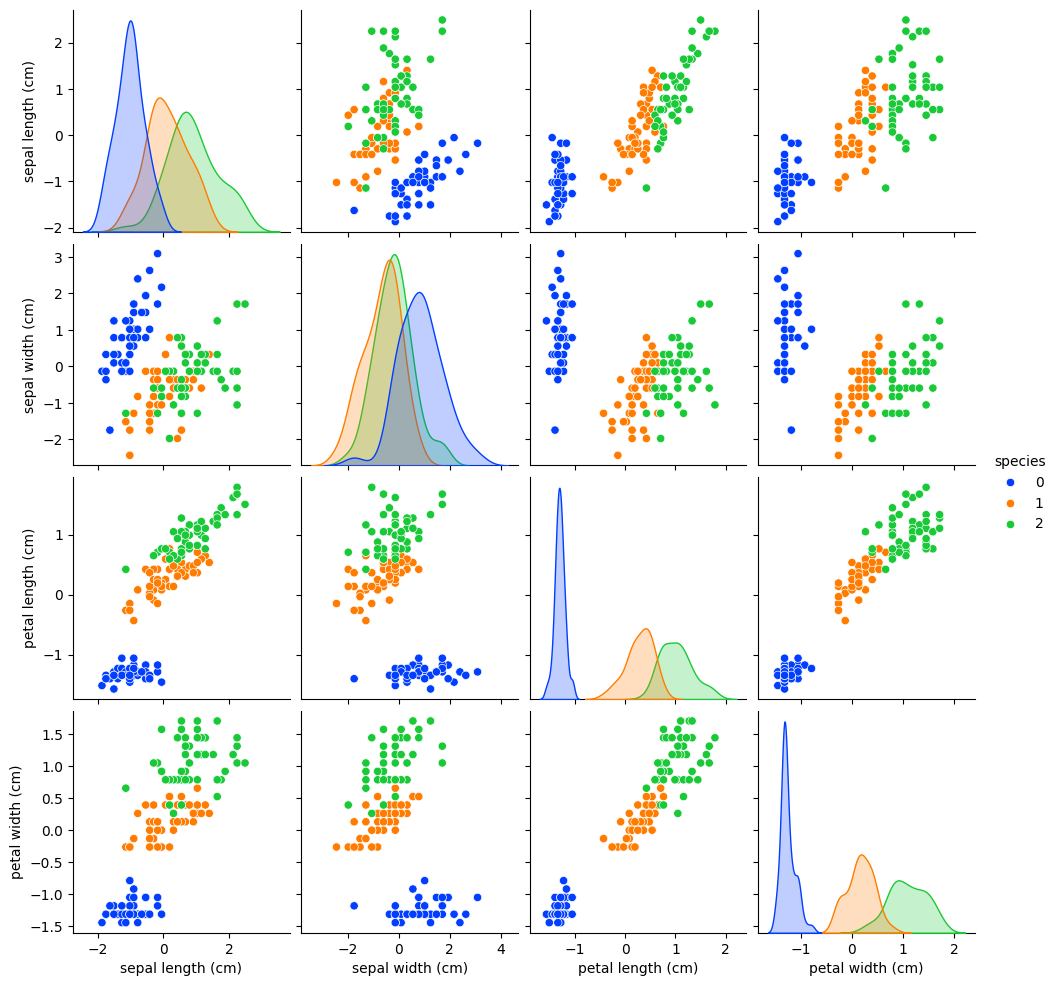

In [14]:
# Plot the Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Plotting Pairplot of Features
iris_df = pd.DataFrame(X_scaled, columns=iris.feature_names)
iris_df['species'] = y
sns.pairplot(iris_df, hue='species', palette='bright', diag_kind='kde')
plt.show()
